In [1]:
path_to_fullres_img = "/storage/research/dbmr_luisierlab/database/Ovarian_Visium_GTOP/Visium_HD/HE_high_res_NAB-HUG-14/NAB-HUG-14_HE_Visium3_Scan1.qptiff"

# Read QPTIFF image using OpenSlide
import openslide

# Open the whole slide image
slide_14 = openslide.OpenSlide(path_to_fullres_img)

# Get basic properties
print(f"Image dimensions (level 0): {slide_14.dimensions}")
print(f"Number of levels: {slide_14.level_count}")
print(f"Level dimensions: {slide_14.level_dimensions}")
print(f"Level downsamples: {slide_14.level_downsamples}")

# Get a thumbnail for quick visualization
thumbnail_14 = slide_14.get_thumbnail(slide_14.dimensions)


Image dimensions (level 0): (19200, 23040)
Number of levels: 4
Level dimensions: ((19200, 23040), (9600, 11520), (4800, 5760), (2400, 2880))
Level downsamples: (1.0, 2.0, 4.0, 8.0)


In [2]:
path_to_fullres_img = "/storage/research/dbmr_luisierlab/database/Ovarian_Visium_GTOP/Visium_HD/HE_high_res_NAB-HUG-03/NAB-HUG-03_HE_Visium3_Scan1.qptiff"

# Read QPTIFF image using OpenSlide
import openslide

# Open the whole slide image
slide_3 = openslide.OpenSlide(path_to_fullres_img)

# Get basic properties
print(f"Image dimensions (level 0): {slide_3.dimensions}")
print(f"Number of levels: {slide_3.level_count}")
print(f"Level dimensions: {slide_3.level_dimensions}")
print(f"Level downsamples: {slide_3.level_downsamples}")

# Get a thumbnail for quick visualization
thumbnail_3 = slide_3.get_thumbnail(slide_3.dimensions)

Image dimensions (level 0): (30720, 38880)
Number of levels: 5
Level dimensions: ((30720, 38880), (15360, 19440), (7680, 9720), (3840, 4860), (1920, 2430))
Level downsamples: (1.0, 2.0, 4.0, 8.0, 16.0)


In [14]:
resolution_14 = float(slide_14.properties.get('tiff.XResolution', 0))
resolution_3 = float(slide_3.properties.get('tiff.XResolution', 0))


# Convert to microns per pixel
# Resolution is in pixels/cm, so we need: cm/pixel * 10000 microns/cm
microns_per_pixel_x_14 = 10000 / resolution_14 if resolution_14 > 0 else None
microns_per_pixel_x_3 = 10000 / resolution_3 if resolution_3 > 0 else None


print(f"Resolution of slide 14: {microns_per_pixel_x_14} µm/pixel")
print(f"Resolution of slide 3: {microns_per_pixel_x_3} µm/pixel")

Resolution of slide 14: 0.24921260779938023 µm/pixel
Resolution of slide 3: 0.24921260779938023 µm/pixel


In [16]:
# Check resolution unit
print(f"Slide 14 properties:")
for key, value in slide_14.properties.items():
    if 'resolution' in key.lower() or 'unit' in key.lower():
        print(f"  {key}: {value}")
        
print(f"\nSlide 3 properties:")
for key, value in slide_3.properties.items():
    if 'resolution' in key.lower() or 'unit' in key.lower():
        print(f"  {key}: {value}")

Slide 14 properties:
  tiff.ResolutionUnit: centimeter
  tiff.XResolution: 40126.380797114987
  tiff.YResolution: 40126.380797114987

Slide 3 properties:
  tiff.ResolutionUnit: centimeter
  tiff.XResolution: 40126.380797114987
  tiff.YResolution: 40126.380797114987


Text(0.5, 1.0, 'Patient 3')

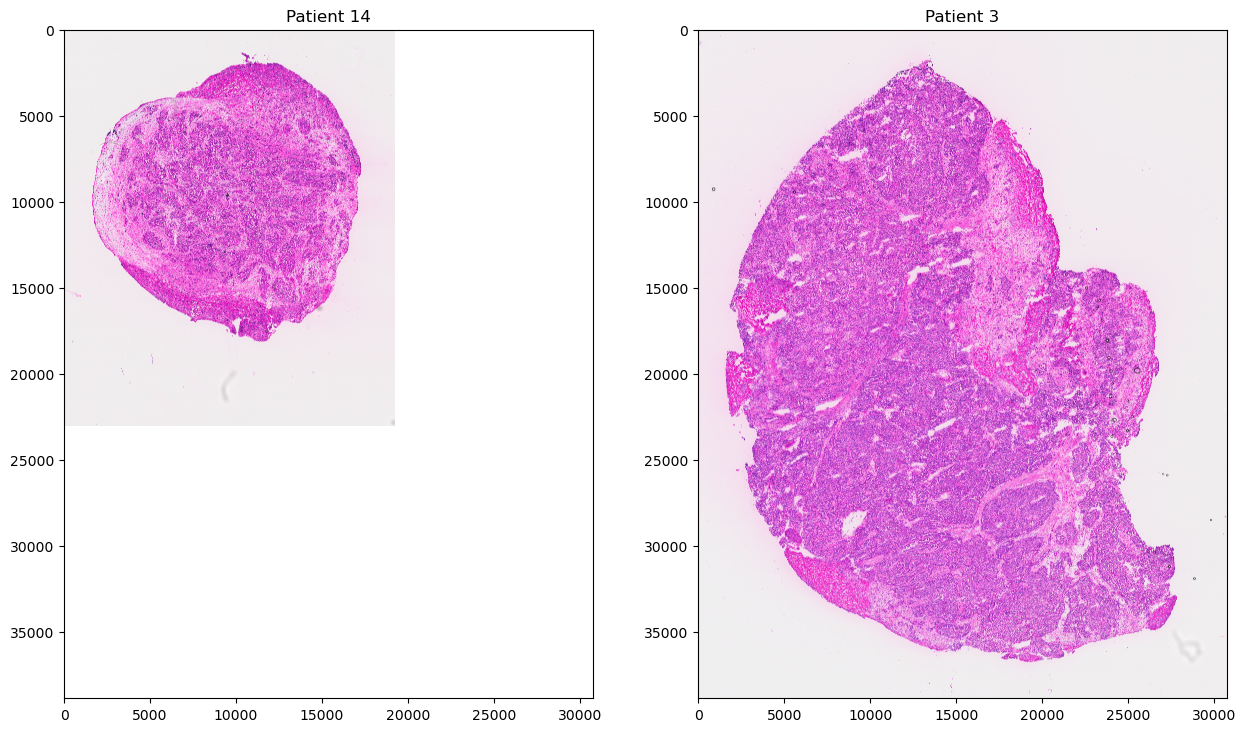

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))


plt.subplot(1, 2, 1)
plt.imshow(thumbnail_14)
plt.xlim(0, thumbnail_3.size[0])
plt.ylim(thumbnail_3.size[1], 0)
plt.title("Patient 14")

plt.subplot(1, 2, 2)
plt.imshow(thumbnail_3)
plt.xlim(0, thumbnail_3.size[0])
plt.ylim(thumbnail_3.size[1], 0)
plt.title("Patient 3")

In [2]:
0.25 * 35000

8750.0

In [17]:
# Calculate actual size for a 20,000 x 20,000 pixel region
pixels = 20000

# Size in microns
size_microns = pixels * microns_per_pixel_x_14
print(f"20,000 pixels = {size_microns:.2f} µm")

# Size in millimeters
size_mm = size_microns / 1000
print(f"20,000 pixels = {size_mm:.2f} mm")

# Size in centimeters
size_cm = size_mm / 10
print(f"20,000 pixels = {size_cm:.2f} cm")

print(f"\nSo a 20,000 x 20,000 pixel region is approximately {size_mm:.2f} mm x {size_mm:.2f} mm")

20,000 pixels = 4984.25 µm
20,000 pixels = 4.98 mm
20,000 pixels = 0.50 cm

So a 20,000 x 20,000 pixel region is approximately 4.98 mm x 4.98 mm
